# Tarea 6

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df_train = df.sample(frac = 0.7)
x_train = df_train[['bmi', 'bp', 's1', 's2','s4','s5']]
y_train = df_train[['target']]

In [4]:
df_test = df.drop(df_train.index)
x_test = df_train[['bmi', 'bp', 's1', 's2','s4','s5']]
y_test = df_train[['target']]

In [5]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)
model.fit(x_train,y_train)

<ipython-input-5-7c446cc3235d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
y_pred = model.predict(x_test)
y_pred

array([ 69.1, 262.2,  92.1, 114.8, 162.5, 322. ,  74. , 108.4, 130.5,
       121.8, 288.9,  77.4, 251.5, 270.2, 258.5, 179.4, 108. , 276.1,
       278.5,  87.5, 229.4,  87.5, 159. , 109.1, 189.1, 132.8,  42.5,
       136.6, 204. , 237.6, 197.3, 190.7, 132.9, 244.5,  54.8,  37.4,
        41.9,  85.7, 305.3,  77.6, 139.8, 231.3, 221.6, 226.8, 233.3,
       186.6,  45.7, 232.9, 267.6, 161. , 196.6,  91.5, 139.2, 177.7,
       129.8, 284. ,  89.1,  73.6, 127. , 218.5, 139.8,  82.1, 271.9,
       222.4, 167.8,  93. , 247.9, 211.5, 124.7, 172.1, 145.7, 136.6,
       264.9, 234.5, 160.3,  87.9, 150.1, 238.2,  99.3,  71.3,  98.4,
       154.6, 139.6,  69.9, 162.9, 154.6,  74.4, 259.5, 124.8, 198.2,
        60.9, 250.4,  76.1, 330.3,  96.8, 276.8, 126.5,  67.7, 195.2,
        99.8,  59.7, 160.4, 309.6, 254.6,  71.1, 110.2, 224.8, 279.8,
       232.1,  93.6, 325.5, 170.9, 269.2, 209.9,  97. , 139.3,  99.2,
       251.7, 247.3, 102. ,  72.4, 161.2, 163.8,  92.7, 148.9, 270.8,
       204.1, 126.3,

In [7]:
mape(y_pred, y_test)

0.136723353260624

In [8]:
sqrt(mse(y_pred, y_test))

25.370686139920537

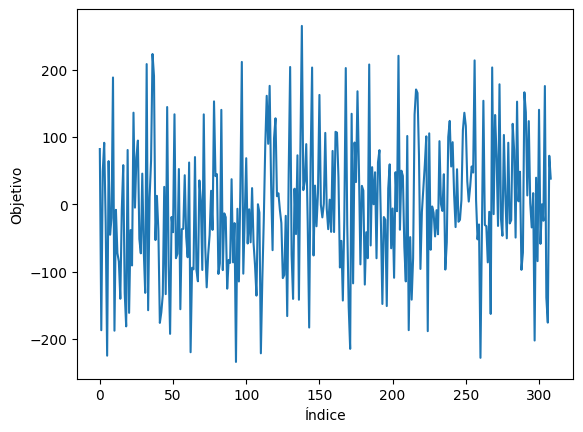

In [20]:
#Diferencia entre los datos y la predicción
plt.figure()
plt.plot(df['target'].head(309) - y_pred)
plt.xlabel('Índice')
plt.ylabel('Objetivo')
plt.show()

Al utilizar el algoritmo de Random Forest podemos ver que tenemos una predicción precisa. Esto debido a que en su proceso utiliza múltiples árboles de decisión, los cuales lo vuelven resiliente a valores atípicos dando lugar a una predicción más acertada en este conjunto de datos en particular. Se nota este ajuste utilizando la métrica de Error de Raíz Cuadrada Media la cual nos muestra de forma clara el error posible en nuestra predicción usando su misma base.

https://www.jstage.jst.go.jp/article/ace/4/3/4_22009/_pdf